In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [20]:
df = pd.read_csv("../Python/Output/powVar.txt", sep='\t')
df.head()

NoiseType  Noise    X  pow  Error Deviation  Error Minimum  Error Maximum  \
0  Gaussian    0.2 -0.8  1.0         1.005679      -1.943775      12.295504   
1   Uniform    0.2 -0.8  1.0         0.907292      -1.110982       2.126143   
2  Gaussian    0.2 -0.6  1.0         1.008171      -2.130532      10.698077   
3   Uniform    0.2 -0.6  1.0         0.928957      -1.187367       2.111621   
4  Gaussian    0.2 -0.4  1.0         1.008978      -2.322253       9.313776   

   Value Deviation  Uncertainty      Mean  ...       1.1       1.3       1.5  \
0         0.191689     0.190607  0.030065  ...  0.171309  0.147418  0.114884   
1         0.172936     0.190607  0.030806  ...  0.223978  0.208979  0.195480   
2         0.138780     0.137655  0.019422  ...  0.179787  0.151854  0.116811   
3         0.127875     0.137655  0.020369  ...  0.227477  0.213479  0.200980   
4         0.089759     0.088960  0.010944  ...  0.184547  0.155648  0.121172   

        1.7       1.9       2.1       2.3       2.5       2.7       2.9  
0  0.075742  0.066084  0.055917  0.043209  0.028975  0.024400  0.014233  
1  0.182982  0.171483  0.102990  0.000000  0.000000  0.000000  0.000000  
2  0.079228  0.069578  0.055866  0.043677  0.031488  0.022854  0.013205  
3  0.188981  0.177982  0.095490  0.000000  0.000000  0.000000  0.000000  
4  0.082640  0.066924  0.059826  0.043602  0.030420  0.020280  0.017238  

[5 rows x 41 columns]

In [4]:
df.columns

Index(['NoiseType', 'Noise', 'X', 'pow', 'Error Deviation', 'Error Minimum',
       'Error Maximum', 'Value Deviation', 'Uncertainty', 'Mean', 'Bias',
       '-2.9', '-2.7', '-2.5', '-2.3', '-2.1', '-1.9', '-1.7', '-1.5', '-1.3',
       '-1.1', '-0.9', '-0.7', '-0.5', '-0.3', '-0.1', '0.1', '0.3', '0.5',
       '0.7', '0.9', '1.1', '1.3', '1.5', '1.7', '1.9', '2.1', '2.3', '2.5',
       '2.7', '2.9'],
      dtype='object')

In [5]:
sorted(df['Noise'].unique())

[1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 0.195,
 0.2]

In [6]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [7]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'],
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    ax.set_title('(1 +/- noise)^exponent')
    ax.set_xlabel('Exponent')
    ax.set_ylabel(' or '.join(sValue))
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.05, 1.0))


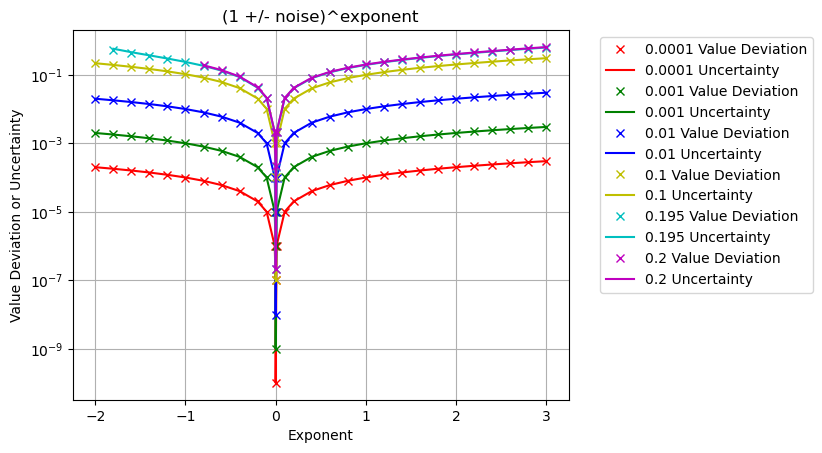

In [8]:
PlotValues()

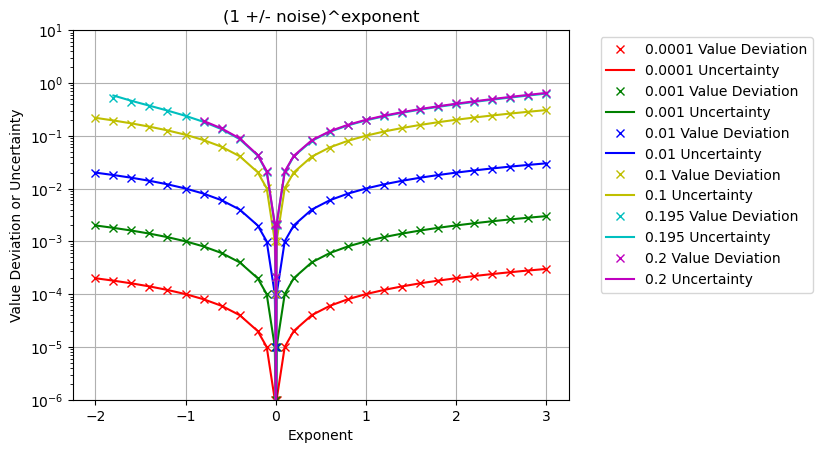

In [9]:
PlotValues(ylim=[1e-6,10])

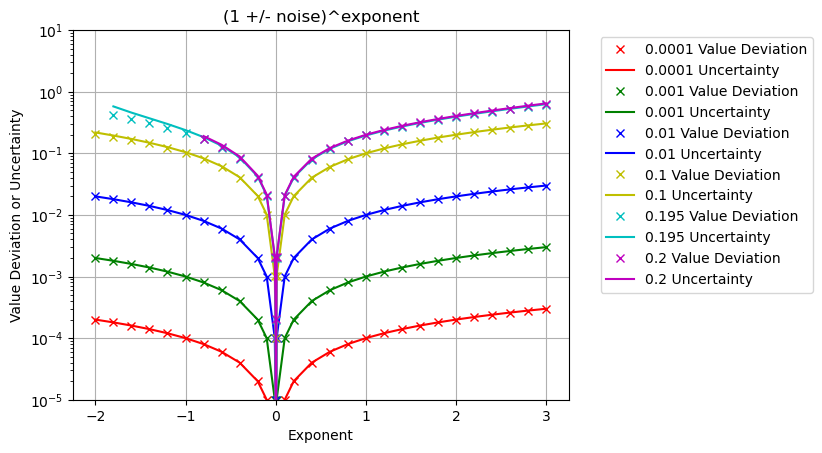

In [10]:
PlotValues(ylim=[1e-5,10], noiseType='Uniform')

In [11]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$(1 \pm \delta x)^c$ with ' + noiseType + ' noise')
    ax.set_xlabel('c')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim([1e-6,10])
    ax.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    #ax2.set_yscale('log')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.575, 1.0))
    ax2.legend(bbox_to_anchor=(1.575, 0.3))
    

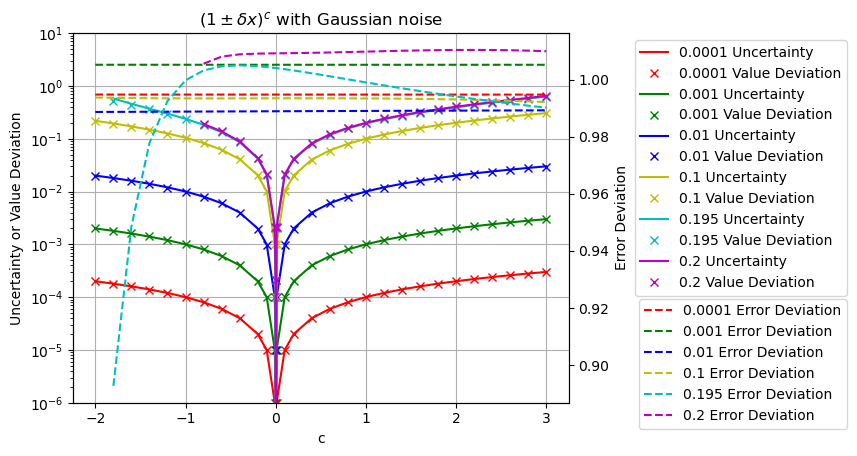

In [12]:
PlotErrorDev()

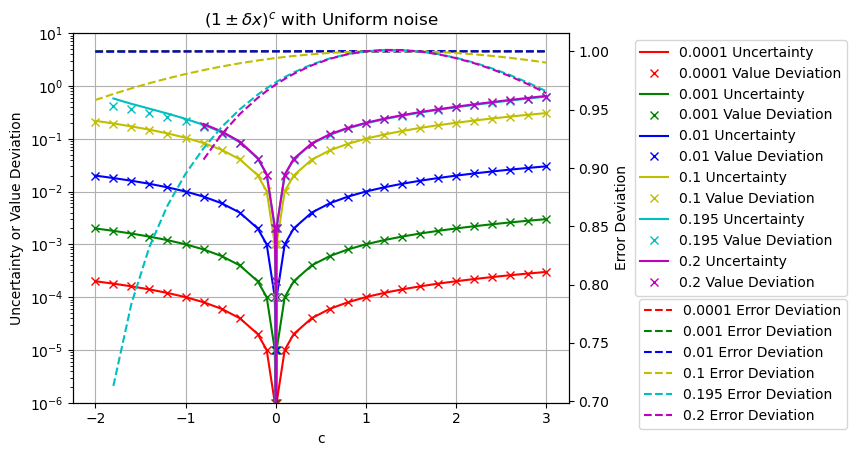

In [13]:
PlotErrorDev('Uniform')

In [21]:
def PlotErrorDev( noiseType='Gaussian', sNoiseStyleMarker=[(0.2,'-','<'), (1e-1,'-.','>'), (1e-2,':','^'), (1e-3,'--','v')],
                  ylim=(1e-6, 1e1) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$(1 \pm \delta x)^c$ with ' + noiseType + ' noise')
    ax.set_xlabel('c')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim([1e-6,10])
    ax.grid(True)
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], f'k{style}', label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], f'k{marker}', label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, style, marker in sNoiseStyleMarker:
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)].sort_values('X')
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], c='gray', ls=style, label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.58, 0.5))
    ax2.legend(bbox_to_anchor=(1.15, 0.9))

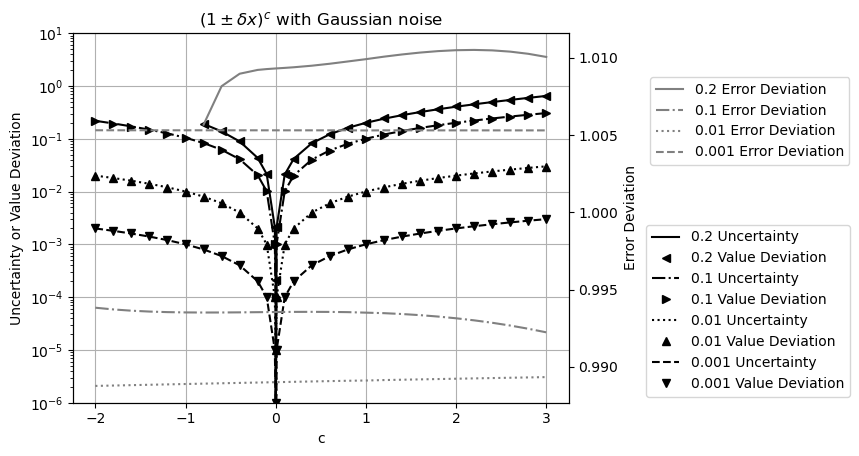

In [22]:
PlotErrorDev()

In [39]:
df[(df['NoiseType']=='Gaussian') & (df['Noise']>=1e-15)]['Error Deviation'].describe()

count    520.000000
mean       0.978042
std        0.135411
min        0.000000
25%        0.993552
50%        0.998049
75%        1.006375
max        1.010520
Name: Error Deviation, dtype: float64

# Mean vs Bias

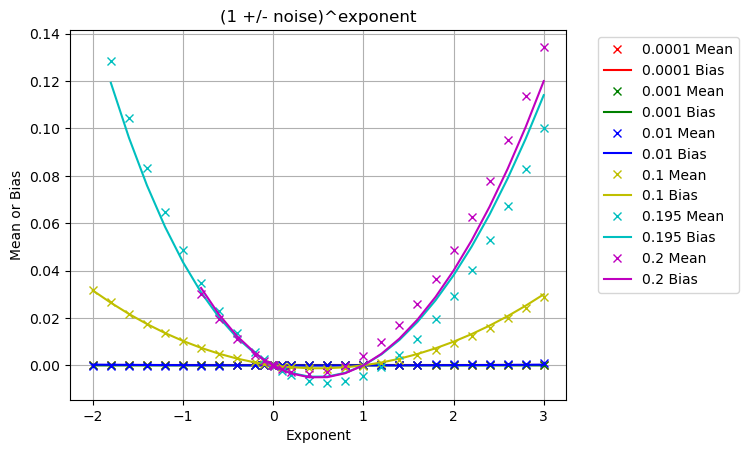

In [14]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'], logy=False)

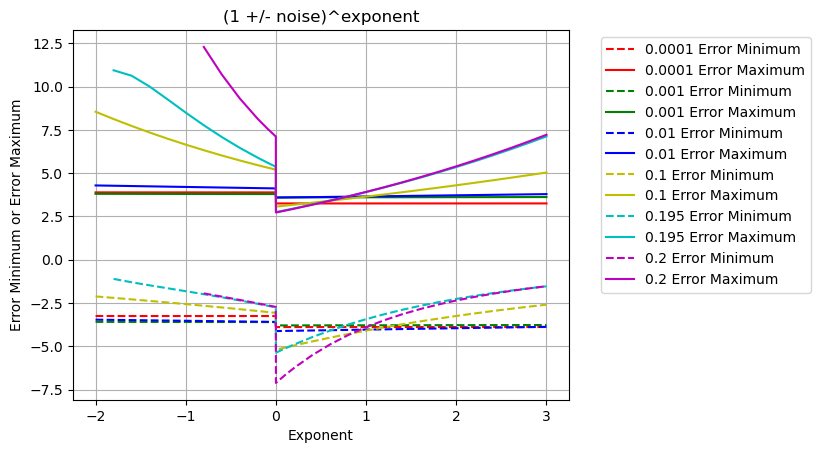

In [15]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# vs Noise vs X

In [24]:
def PlotSurface(value, noiseType):
    logz = (value == 'Uncertainty')
    dfOrderVsNoise = df[(df['NoiseType']==noiseType)]\
                .pivot(index='Noise', columns='X', values=value)
    sOrder = dfOrderVsNoise.columns.values
    sNoise = dfOrderVsNoise.index.values
    sX, sY = np.meshgrid(sOrder, sNoise)
    sY = np.log10(sY)
    sZ = np.log10(dfOrderVsNoise.values) if logz else dfOrderVsNoise.values
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(30, -45) if logz else ax.view_init(30, 45)
    surf = ax.plot_surface( sX, sY, sZ, cmap=plt.cm.spring if logz else plt.cm.winter )
    cb = fig.colorbar(surf, shrink=0.5, aspect=5, pad=0.15)
    
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    
    ax.set_xlabel('X')
    sXTick = [sOrder[i] for i in range(0, len(sOrder), 4)]
    ax.set_xticks(sXTick, [f'{x}' for x in sXTick])
    
    ax.set_ylabel('Input Noise')
    sYTick = [sNoise[i] for i in range(0, len(sNoise), 3)]
    ax.set_yticks(np.log10(sYTick), [f'{y:.1e}' for y in sYTick])
    
    ax.set_zlabel(value)
    if value == 'Error Deviation':
        pass
        # TODO: adjust color range 
        # ax.set_zlim([0, 2])
        # cb.set_clim([0, 2])
    if logz:
        zMin = int(math.floor(np.min(sZ)))
        zMax = int(math.ceil(np.max(sZ)))
        sZTick = range(zMin, zMax, int(math.ceil((zMax - zMin)/10)))
        ax.set_zticks(sZTick, [f'1e{z:+}' for z in sZTick])

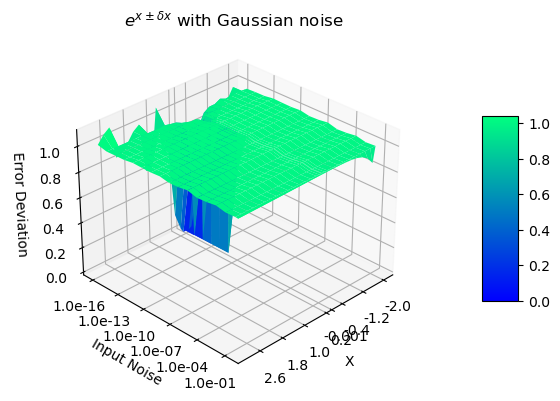

In [26]:
PlotSurface('Error Deviation', 'Gaussian')

NameError: name 'zMin' is not defined

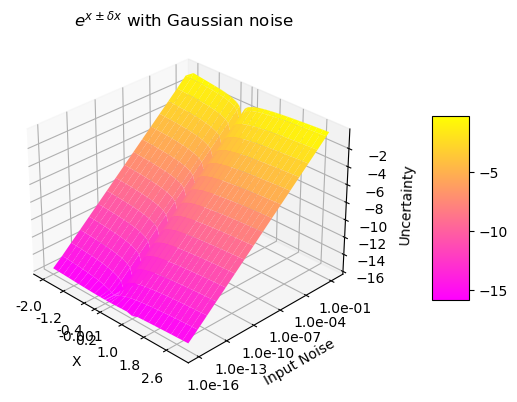

In [25]:
PlotSurface('Uncertainty', 'Gaussian')

# Histogram

In [27]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

-2.9  -2.7  -2.5      -2.3      -2.1      -1.9      -1.7      -1.5  \
0   0.0   0.0   0.0  0.000000  0.000000  0.000508  0.008133  0.038125   
1   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
2   0.0   0.0   0.0  0.000000  0.000508  0.003555  0.019807  0.058913   
3   0.0   0.0   0.0  0.000000  0.000000  0.000000  0.000000  0.000000   
4   0.0   0.0   0.0  0.000507  0.000507  0.012675  0.034983  0.081119   

       -1.3      -1.1  ...       1.1       1.3       1.5       1.7       1.9  \
0  0.102684  0.201301  ...  0.171309  0.147418  0.114884  0.075742  0.066084   
1  0.000000  0.316468  ...  0.223978  0.208979  0.195480  0.182982  0.171483   
2  0.122905  0.233621  ...  0.179787  0.151854  0.116811  0.079228  0.069578   
3  0.000000  0.479952  ...  0.227477  0.213479  0.200980  0.188981  0.177982   
4  0.148043  0.242344  ...  0.184547  0.155648  0.121172  0.082640  0.066924   

        2.1       2.3       2.5       2.7       2.9  
0  0.055917  0.043209  0.028975  0.024400  0.014233  
1  0.102990  0.000000  0.000000  0.000000  0.000000  
2  0.055866  0.043677  0.031488  0.022854  0.013205  
3  0.095490  0.000000  0.000000  0.000000  0.000000  
4  0.059826  0.043602  0.030420  0.020280  0.017238  

[5 rows x 30 columns]

In [28]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique(),
               sStyle=['r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'y-', 'y--', 'c-', 'c--', 'm-', 'm--'] ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot( xlabel='Normalized Error', ylabel='Normalized Histogram Count',
                                title='(1 +/- noise)^exponent',
                                style=sStyle)
    ax.grid(True)
    ax.legend(bbox_to_anchor=(1.0, 1.0))    


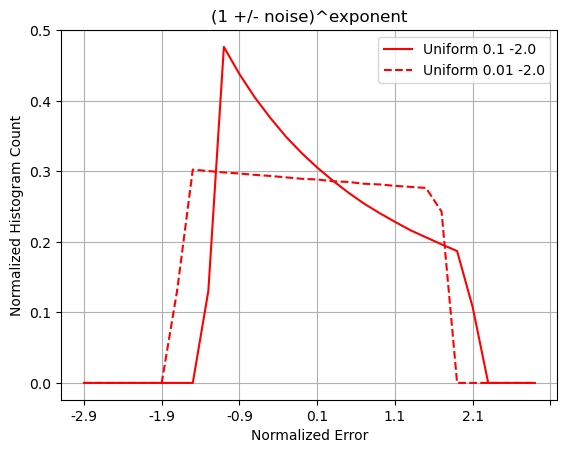

In [29]:
PlotHisto( sNoise=[0.01, 0.02, 0.05, 0.1, 0.195, 0.2], sX=[-1.5,-2] )

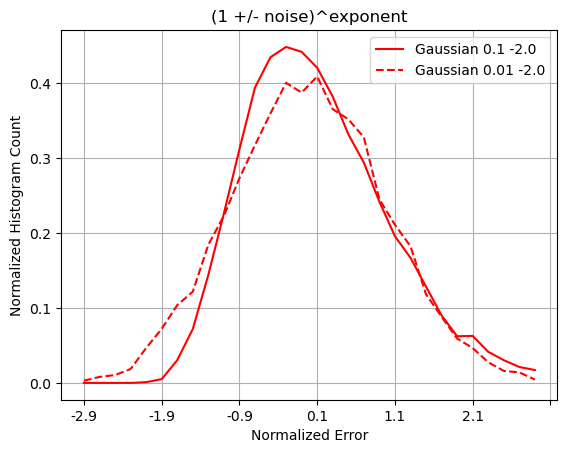

In [30]:
PlotHisto( sNoise=[0.01, 0.02, 0.05, 0.1, 0.195, 0.2], sX=[-1.5,-2],sNoiseType=['Gaussian'] )

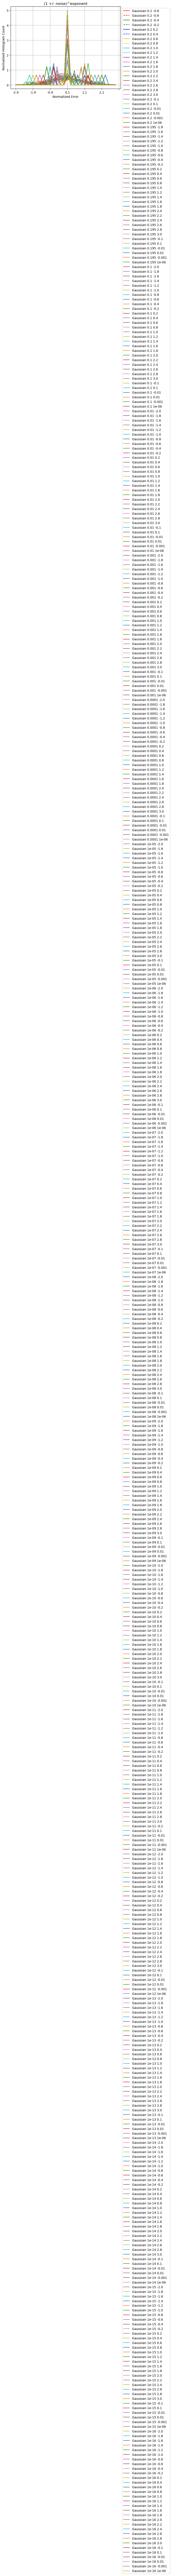

In [31]:
PlotHisto(sNoiseType=['Gaussian'])

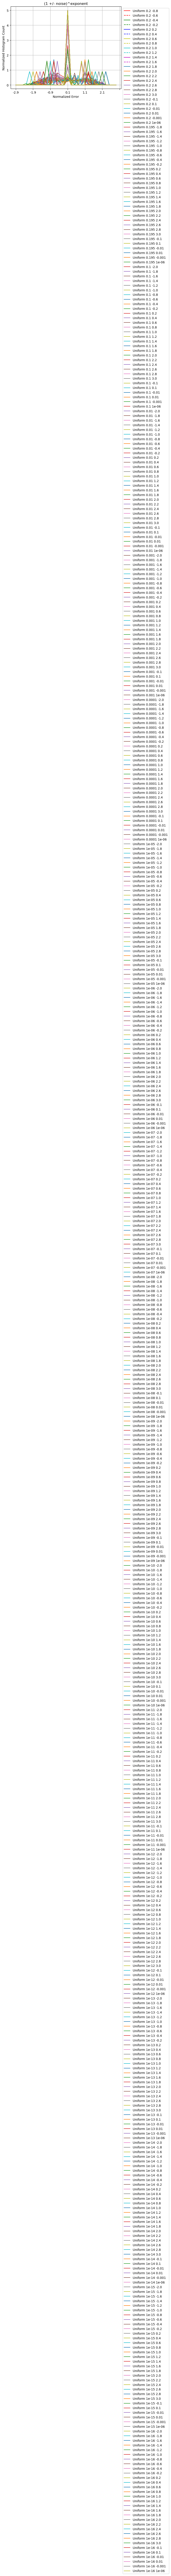

In [32]:
PlotHisto()

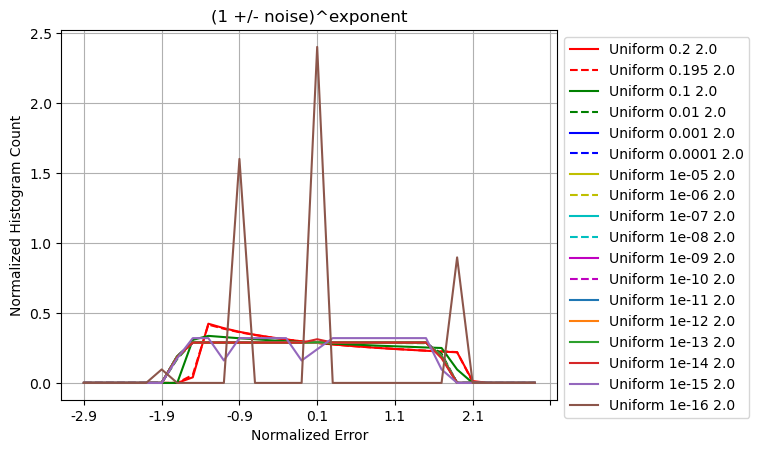

In [33]:
PlotHisto(sX=[2])

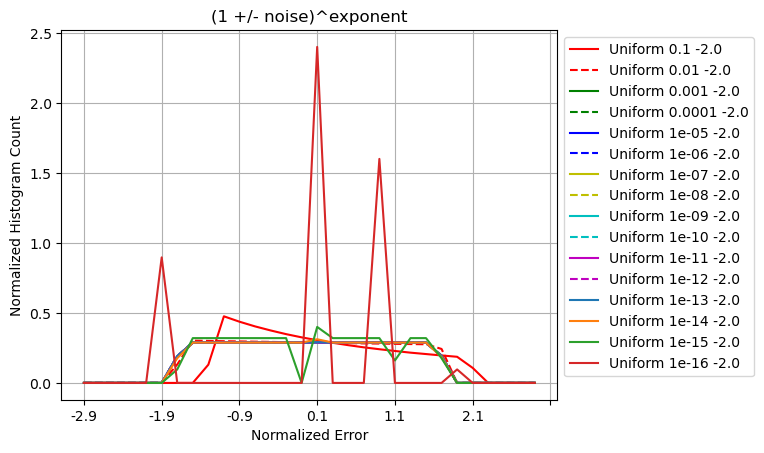

In [34]:
PlotHisto(sX=[-2])

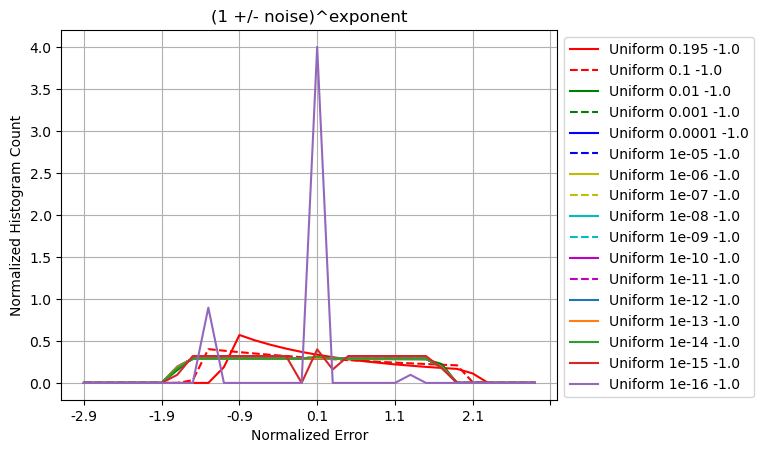

In [35]:
PlotHisto(sX=[-1])

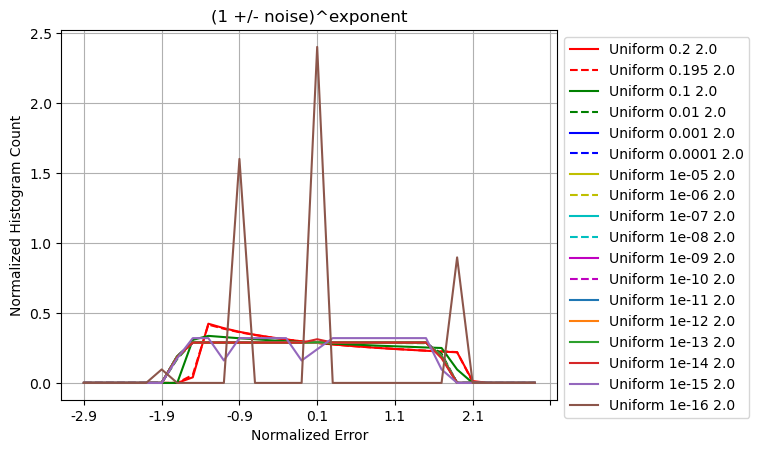

In [36]:
PlotHisto(sX=[2])

In [37]:
PlotHisto(sX=[-0.5])

TypeError: no numeric data to plot

In [ ]:
PlotHisto(sX=[0.75])

In [ ]:
PlotHisto(sX=[-0.75])

In [ ]:
PlotHisto(sX=[+1])

In [ ]:
PlotHisto(sX=[-1])